In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


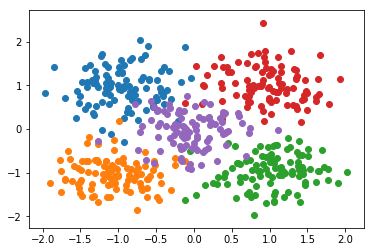

In [16]:
n_pts = 500
centerss = np.array([[-1,1],[-1,-1],[1,-1],[1,1],[0,0]])
X,Y = datasets.make_blobs(n_samples = n_pts,random_state = 123, centers = centerss,cluster_std = 0.4)
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])
plt.show()

In [3]:
from keras.utils.np_utils import to_categorical

In [17]:
y_cat = to_categorical(Y,5,) # hotencoding


In [18]:
model = Sequential()
model.add(Dense(units=5, input_shape = (2,),activation='softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy',metrics=['accuracy'] )

In [19]:
h = model.fit(x=X,y=y_cat, verbose = 1,batch_size = 50, epochs = 100)

Epoch 1/100
500/500 [==============================] - 0s 746us/step - loss: 1.0782 - acc: 0.6000
Epoch 2/100
500/500 [==============================] - 0s 40us/step - loss: 0.5792 - acc: 0.8420
Epoch 3/100
500/500 [==============================] - 0s 40us/step - loss: 0.3918 - acc: 0.9240
Epoch 4/100
500/500 [==============================] - 0s 46us/step - loss: 0.3155 - acc: 0.9420
Epoch 5/100
500/500 [==============================] - 0s 60us/step - loss: 0.2766 - acc: 0.9480
Epoch 6/100
500/500 [==============================] - 0s 40us/step - loss: 0.2530 - acc: 0.9460
Epoch 7/100
500/500 [==============================] - 0s 77us/step - loss: 0.2379 - acc: 0.9440
Epoch 8/100
500/500 [==============================] - 0s 64us/step - loss: 0.2256 - acc: 0.9460
Epoch 9/100
500/500 [==============================] - 0s 47us/step - loss: 0.2156 - acc: 0.9480
Epoch 10/100
500/500 [==============================] - 0s 50us/step - loss: 0.2079 - acc: 0.9480
Epoch 11/100
500/500 [======

In [9]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel() # converts the array into 1D array
    grid = np.c_[xx_,yy_]
    pred_func = model.predict_classes(grid) # predict_classes instead of predict
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

Prediction is :  [2]


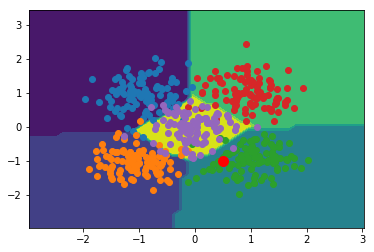

In [20]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])
plt.scatter(X[Y==3,0],X[Y==3,1])
plt.scatter(X[Y==4,0],X[Y==4,1])

x,y = 0.5,-1
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y],marker='o',markersize=10,color='r')
print('Prediction is : ',prediction)
